# Popular Data Science Questions to find content for a company


Our goal is to examine the content for Data Science in [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine content for our company.

In this project we will figure out what data science questions are the most popular ones to be learned. To investigate this question, we're going to use [Stack Exchange](https://stackexchange.com), a question-and-answer website network, hosting 176 self-moderating sites on a great variety of fields, including data science, mathematics, programming, languages, travelling, music, etc.

Stack Exchange employs a reputation award system for its questions, answers, and users. Each post is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Since data science is a multidisciplinary field, there are a few Stack Exchange websites that can be potentially relevant to our goal:
- [Data Science](https://datascience.stackexchange.com)
- [Stack Overflow](https://stackoverflow.com)
- [Cross Validated](https://stats.stackexchange.com)
- [Artificial Intelligence](https://ai.stackexchange.com)
- [Mathematics](https://math.stackexchange.com)

And, if to consider also data engineering:

- [Database Administrators](https://dba.stackexchange.com)
- [Unix & Linux](https://unix.stackexchange.com)
- [Software Engineering](https://softwareengineering.stackexchange.com)

On [this link](https://stackexchange.com/sites?view=list#percentanswered), we'll find a complete list of Stack Exchange websites sorted by % of answered questions. Currently, at the time of this writing (12.01.2021), Data Science Stack Exchange (DSSE) is on the 13th place from the bottom with respect to this metric, having only 67% of answered questions.

The fact that DSSE is a site specialized exactly on data science (contrarily to the others), coupled with it having a high percentage of unanswered questions, makes it an ideal candidate for our investigation.


## What kind of questions are welcome on this site?

On DSSE's help center's section on [questions](https://datascience.stackexchange.com/help/how-to-ask) , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- [Open Data](https://opendata.stackexchange.com/help/on-topic)(Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

## What, other than questions, does DSSE's home subdivide into?
On the home page we can see that we have four sections:

- [Questions](https://opendata.stackexchange.com/questions) — a list of all questions asked;
- [Tags](https://opendata.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions).Tagging the question in relavant tags helps to navigate and to answer questions easily.
- [Users](https://opendata.stackexchange.com/users) — a list of users;
- [Unanswered](https://opendata.stackexchange.com/unanswered) — a list of unanswered questions;
The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

## What information is available in each post?
Looking, just as an example, at [this](https://datascience.stackexchange.com/questions/47768/can-i-forecast-with-discontinued-data-using-arima) question, some of the information we see is:
- For questions only:
 - When was the question asked?
 - When was the question last edited
 - The last time the question as active;
 - How many views the question get
 - Share, follow and edit question section
 - Tags for the question

- For both questions and answers:
 - The posts's score;
 - The posts's title;
 - The posts's author;
 - The posts's body;
 - Share, follow and edit answer section
 - comments section

## Stack Exchange Data Explorer

Stack Exchange provides a public database for each of its websites. To access and explore the public data of each particular site en masse, we have an open source tool available - [Stack Exchange Data Explorer (SEDE)](https://data.stackexchange.com/help). It uses a Microsoft's dialect of SQL called Transact-SQL.

Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database. From the Database Schema,  we can see that the database contains the following 29 tables:
- `Posts`
- `Users`
- `Comments`
- `Badges`
- `CloseAsOffTopicReasonTypes`
- `CloseReasonTypes`
- `FlagTypes`
- `PendingFlags`
- `PostFeedback`
- `PostHistory`
- `PostHistoryTypes`
- `PostLinks`
- `PostNotices`
- `PostNoticeTypes`
- `PostsWithDeleted`
- `PostTags`
- `PostTypes`
- `ReviewRejectionReasons`
- `ReviewTaskResults`
- `ReviewTaskResultTypes`
- `ReviewTasks`
- `ReviewTaskStates`
- `ReviewTaskTypes`
- `SuggestedEdits`
- `SuggestedEditVotes`
- `Tags`
- `TagSynonyms`
- `Votes`
- `VoteTypes`

or, in the form of schema diagram:

![tt](https://i.stack.imgur.com/AyIkW.png)

To see the names and data types of the columns of each table, we can click on the table name in the Database Schema.

Let's explore DSSE's data model and investigate a few of the tables. From the list above, the most promising tables seem to be the following ones (together with their column names, mostly self-explanatory):

- **Posts**: `Id`, `PostTypeId`, `AcceptedAnswerId`, `ParentId`, `CreationDate`, `DeletionDate`, `Score`, `ViewCount`, `Body`, `OwnerUserId`, `OwnerDisplayName`, `LastEditorUserId`, `LastEditorDisplayName`, `LastEditDate`, `LastActivityDate`, `Title`, `Tags`, `AnswerCount`, `CommentCount`, `FavoriteCount`, `ClosedDate`, `CommunityOwnedDate`, `ContentLicense`.
- **Tags**: `Id`, `TagName`, `Count`, `ExcerptPostId`, `WikiPostId`, `IsModeratorOnly`, `IsRequired`.
- **TagSynonyms**: `Id`, `SourceTagName`, `TargetTagName`, `CreationDate`, `OwnerUserId`, `AutoRenameCount`, `LastAutoRename`, `Score`, `ApprovedByUserId`, `ApprovalDate`.


#### Perusing the table names, a few stand out as relevant for our goal:

- Posts
- PostTags
- Tags
- TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. 

For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.Explore some of the questions that were asked.

SELECT TOP 10 *
  FROM tags
 ORDER BY Count DESC;


Id |	TagName|	Count |	ExcerptPostId |	WikiPostId
--- | --- | --- |---|---
2	|machine-learning |	6919 |	4909 |	4908 
46 |	python |	3907 |	5523 |	5522 
81 |	neural-network |	2923 |	8885 |	8884 
194 |	deep-learning |	2786 |	8956 |	8955 
77 |	classification |	1899| 	4911 |	4910 
324 |	keras |	1736 |	9251 |	9250 
128 |	scikit-learn |	1303 |	5896 |	5895 
321|	tensorflow |	1224 |	9183 |	9182 
47 |	nlp	| 1162 |	147 |	146 
24 |	r |	1114 |	49 |	48 

In [1]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

questions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


**REMARK:** We see that FavoriteCount column has missing values.That means that question was not favored in user's  favorite list. So, we can replace those missing values with 0. Also, we can change the data type of FavoriteCount column to integer type as it's more appropriate after replacing the missing values with zero.

Also, lets examine the type of the Tags column. Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.


In [2]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [3]:
print(questions["Tags"][2])

<python><time-series><forecast><forecasting>


The values in this column are string type. On Stack Exchange, Each question can be tagged with 5 Tags. So, it's better to separate tags from 1-5 (like Tag1,Tag2,Tag3,Tag4 and Tag5) for a each question.

## Cleaning the Data

In [4]:
# Fill Nan values
questions.fillna(value={"FavoriteCount": 0}, inplace=True)


questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [5]:
questions["Tags"].head(10)

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
5                                        <fuzzy-logic>
6    <time-series><anomaly-detection><online-learning>
7                               <matrix-factorisation>
8                <correlation><naive-bayes-classifier>
9    <machine-learning><python><deep-learning><kera...
Name: Tags, dtype: object

In [6]:
# Transform tags column into list of tags


questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions["Tags"].head(10)

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
5                                        [fuzzy-logic]
6    [time-series, anomaly-detection, online-learning]
7                               [matrix-factorisation]
8                [correlation, naive-bayes-classifier]
9    [machine-learning, python, deep-learning, kera...
Name: Tags, dtype: object

# Data Analysis 

### Frequency of tags used in posts
The tags column will be very useful for this as they tell us what the topic of each post is. let's start by taking a look at the most common tags:

Text(0.5, 0, 'Count')

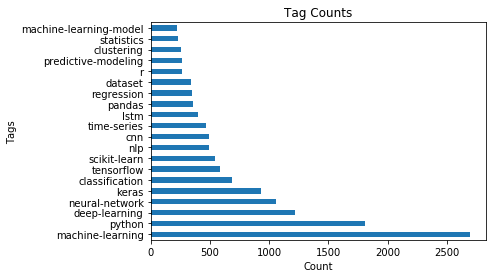

In [7]:
# Calculate number of posts for each tag
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# Transform frequencies into pandas series
tag_count_series = pd.Series(tag_count, name="Count")

# Sort values
tag_count_series = tag_count_series.sort_values(ascending=False)
# Filter top 20 tags
most_used = tag_count_series[:20]
# Plot in a bar chart
ax = most_used.plot.barh()
ax.set_title("Tag Counts")
ax.set_ylabel("Tags")
ax.set_xlabel("Count")

We can see from the graph above that the most popular tag is Machine learning followed by python, with deep learning, neural network and Keras all popular as well.

## Frequency of each tag that was viewed

**Now to take a look at how many views each of the posts with these tags get. Just because there are a lot of questions involving these tags does not mean that they attract a lot of attention.**

In [8]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:00,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:00,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:00,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:00,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:00,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


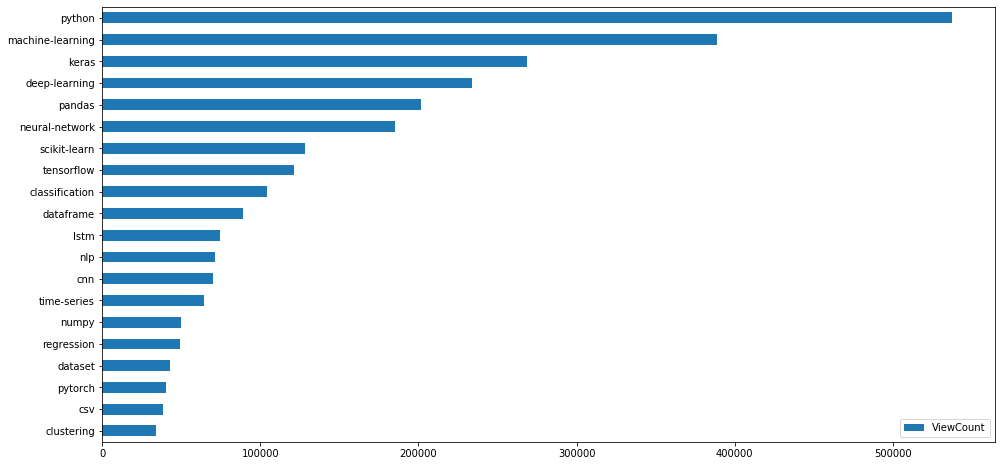

In [9]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

This time top five most viewed tags are Python, Machine-learning, Keras, Deep learning and Pandas. We see that Pandas has jumped up from the 13th most posts to the 5th most views. This indicates that Pandas posts must generate a lot of interest. 

## Merging frequencies together

Let's see what tags are in most_used, but not in most_viewed. We can identify them by the missing values in ViewCount below.

In [10]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


The tags present in most_used and not present in most_viewed are:

- machine-learning-model
- statistics
- predictive-modeling
- r

And the tags present in most_viewed but not in most_used are:

- csv
- pytorch
- dataframe

In [11]:
in_viewed = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


The tags present in most_used and not present in most_viewed are:

- machine-learning-model
- statistics
- predictive-modeling
- r

And the tags present in most_viewed but not in most_used are:

- csv
- pytorch
- dataframe

In [12]:
# Merge frequency series together
merged_frequencies = pd.merge(most_used, most_viewed, how="inner", left_index=True, right_index=True)
merged_frequencies

,Count,ViewCount
machine-learning,2693,388499
python,1814,537585
deep-learning,1220,233628
neural-network,1055,185367
keras,935,268608
classification,685,104457
tensorflow,584,121369
scikit-learn,540,128110
nlp,493,71382
cnn,489,70349


# Relationship between tags

[Dealing with List Values in Pandas Dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173) is an interesting article which tell how to process list values in dataframe and visualize the data.

Let's follow following steps to generate heatmap to look for correlation between tags
- extract all the tags
- create a dataframe where each row will represent a tag, and each column as well.
    - Fill values with 0
- for loop to count tags occurance in each row of the dataset
    - for each lists of tags in questions["Tags"], we will increment the intervening tags by one.
- Extract most_used tags values
- create heatmap


In [35]:
all_tags=list(tag_count_series.index)
# Create a dataframe with tags in index and columns
relations_most_used = pd.DataFrame(index=all_tags, columns=all_tags)
relations_most_used.head(2)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,marginal-effects,hurdle-model,least-squares-svm,proximal-svm,cs231n,statsmodels,rdkit,apache-nifi,activation,kitti-dataset
machine-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# fill dataframe with zeros
relations_most_used.fillna(0, inplace=True)

In [38]:
# tell how many times each pair of tags were used together.

for tags in questions["Tags"]:
    relations_most_used.loc[tags, tags] += 1

In [27]:
# This dataframe is quite large. Let's focus our attention on the most used tags.
top_most_used_relation=relations_most_used.loc[most_used.index,most_used.index]
top_most_used_relation

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17


- The time-series was used together with r 22 times. 
- Diagonal values in tell us how many times each of the tags was used.
- We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

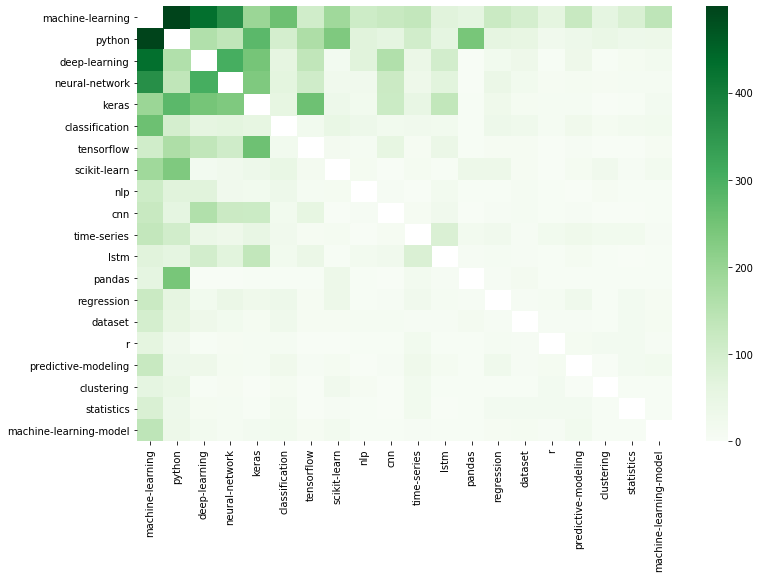

In [34]:
for i in range(top_most_used_relation.shape[0]):
    top_most_used_relation.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(top_most_used_relation, cmap="Greens", annot=False)

# Enter Domain Knowledge
Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion). Pandas is a module of Python and the 2 are obviously linked. So my first suggestion for Data Science content would involve a lot of Python. The other popular tags are all connected to deep learning.

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# Check Popularity Over time

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

we will track the interest in deep learning across time. We will:

- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

In [13]:
# Read data into pandas dataframe
all_years = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

# Transform tags column into list of tags
all_years["Tags"] = all_years["Tags"].str.replace("<", "").str.replace(">", ",")
all_years["Tags"] = all_years["Tags"].str.split(",")

# Create year column
import datetime as dt
all_years["year"] = all_years["CreationDate"].dt.strftime("%Y")
all_years["year"] = all_years["year"].astype(int)

Let's a columns that includes one of the popular deep learning topics that we discovered from the 2019 data.

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [14]:
# Function to find Deep learning tags
def find_deep(value):
    deep_learning = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
    for d in deep_learning:
        if d in value:
            return True

# Apply function
all_years["Deep_learning"] = all_years["Tags"].apply(find_deep)


# Filter out incomplete 2020 data
all_years = all_years[all_years["year"] < 2020]
# Show Dataset wiht new columns
all_years.head()

,Id,CreationDate,Tags,year,Deep_learning
0,45416,2019-02-12 00:36:00,"[python, keras, tensorflow, cnn, probability, ]",2019,True
1,45418,2019-02-12 00:50:00,"[neural-network, ]",2019,True
2,45422,2019-02-12 04:40:00,"[python, ibm-watson, chatbot, ]",2019,None
3,45426,2019-02-12 04:51:00,"[keras, ]",2019,True
4,45427,2019-02-12 05:08:00,"[r, predictive-modeling, machine-learning-mode...",2019,None


Let's create a column that identifies the quarter in which a question was asked.

In [39]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    # // operator divides and rounds the result
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_years["Quarter"] = all_years["CreationDate"].apply(fetch_quarter)

For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [41]:
quarterly = all_years.groupby('Quarter').agg({"Deep_learning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
2,14Q4,21,216,0.097222
10,16Q4,177,527,0.335863
5,15Q3,45,311,0.144695
19,19Q1,804,1987,0.404630
3,15Q1,18,190,0.094737


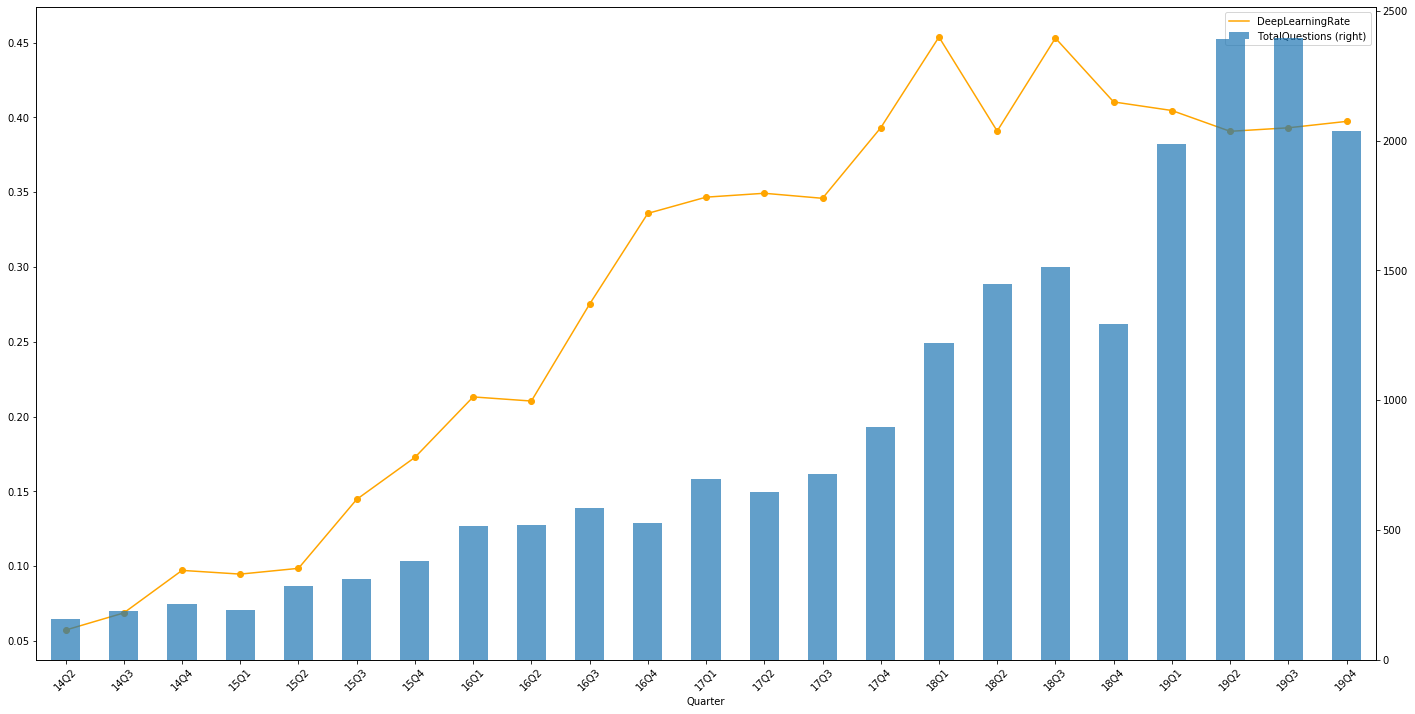

In [46]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)



# Conclusion

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.